# Final Project

## 1. Scope the Project

Our plan is to use a supervised learning technique to predict which customers are most likely to cancel their subscription using **the past three months of customer data which includes subscription and listening history**.

## 2. Gather Data

Read the following files into Python:
* Customer data: *maven_music_customers.csv*
* Listing history: *maven_music_listening_history.xlsx*

In [1]:
# Read in the customer data
import pandas as pd

customers = pd.read_csv('../Data/maven_music_customers.csv')
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [4]:
# Read in the listening history
listen = pd.read_excel('../Data/maven_music_listening_history.xlsx')
listen.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [ ]:
# Hint: Where might you find listening history data beyond the ID's?
# -> Check other spreadsheets in the excel

In [6]:
# Read in the audio data
audio = pd.read_excel('../Data/maven_music_listening_history.xlsx',sheet_name=1)
audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [9]:
# Read in the session data
session = pd.read_excel('../Data/maven_music_listening_history.xlsx',sheet_name=2)
session.head()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


## 3. Clean Data

### a. Convert Data Types

Check the data types of the data in the tables and convert to numeric and datetime values as necessary.

In [21]:
# Check the data types
# Have incorrect data types
customers.dtypes

Customer ID                   int64
Customer Name                object
Email                        object
Member Since         datetime64[ns]
Subscription Plan            object
Subscription Rate           float64
Discount?                    object
Cancellation Date    datetime64[ns]
dtype: object

In [11]:
# Have correct data types
listen.dtypes

Customer ID     int64
Session ID      int64
Audio Order     int64
Audio ID        int64
Audio Type     object
dtype: object

In [12]:
# Have correct data types
audio.dtypes

ID            object
Name          object
Genre         object
Popularity     int64
dtype: object

In [13]:
# Have correct data types
session.dtypes

Session ID                      int64
Session Log In Time    datetime64[ns]
dtype: object

In [14]:
# Convert objects to numeric and datetime fields

# Changing Member since to date time column
customers['Member Since'] = pd.to_datetime(customers['Member Since'])

In [16]:
# Changing Cancellation date to date time column
customers['Cancellation Date'] = pd.to_datetime(customers['Cancellation Date'])

In [20]:
# Changing Subscription Rate to numeric column
customers['Subscription Rate'] = pd.to_numeric(customers['Subscription Rate'].astype('str').str.replace('$',''))

/tmp/ipykernel_5812/758748107.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  customers['Subscription Rate'] = pd.to_numeric(customers['Subscription Rate'].astype('str').str.replace('$',''))


### b. Resolve Data Issues

Check for missing data, inconsistent text and typos, duplicate data and outliers.

In [36]:
customers.sample(10)

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,NaN,2.99,NaN,2023-06-01
16,6406,Beatrice Sharp,Email: beats.by.beatrice@email.com,2023-04-08,Basic (Ads),2.99,NaN,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,NaN,2.99,NaN,NaT
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,NaN,NaT
20,6821,Reed Flat,Email: flat.tunes@email.edu,2023-04-24,Basic (Ads),2.99,NaN,NaT
17,6584,Bobby Bass,Email: bass.master.bobby@email.edu,2023-04-09,Basic (Ads),2.99,NaN,NaT
18,6586,Lyric Saunders,Email: lyrical.saunders@email.edu,2023-04-16,Basic (Ads),2.99,NaN,NaT
19,6588,Harmony Bass,Email: bass.harmony@email.com,2023-04-16,Basic (Ads),2.99,NaN,2023-06-01
22,6824,Greta Groove,Email: groovy.greta@email.com,2023-05-01,Premium (No Ads),7.99,Yes,2023-06-02
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,NaN,NaT


#### i. Missing Data

In [25]:
# Look for NaN values in the data
customers.isna().sum()

Customer ID           0
Customer Name         0
Email                 0
Member Since          0
Subscription Plan     5
Subscription Rate     0
Discount?            23
Cancellation Date    17
dtype: int64

In [ ]:
# How I will handle the missing data
# Subscription plan - Drop it
# Discount? and Cancellation Date - Keep the missing data

In [ ]:
# Droping the rows that have a missing

#### ii. Inconsistent Text & Typos

In [ ]:
# Look for inconsistent text & typos
# Email has inconsistent texts

#### iii. Duplicate Rows

In [30]:
# Look for duplicate rows - No duplicate rows


0

#### iv. Outliers

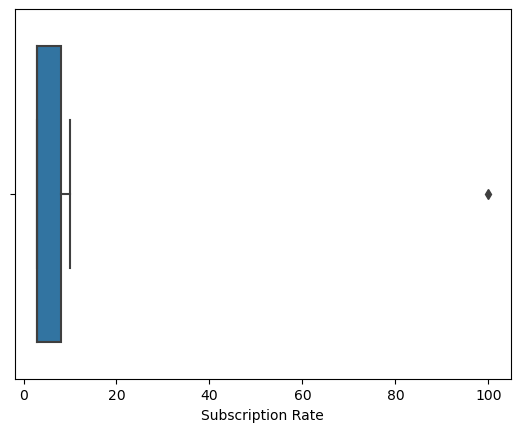

In [37]:
# Look for outliers
# We have an outlier

import seaborn as sns

sns.boxplot(x=customers['Subscription Rate']);

### c. Create New Columns

Create two new columns that will be useful for EDA and modeling:
* Cancelled: whether a customer cancelled or not
* Email: Remove the "Email:" from the email addresses

In [ ]:
# Create a 'Cancelled' column


In [ ]:
# Create an updated 'Email' column without the Email: portion


## 4. EDA

Try to better understand the customers who cancelled:
* How long were they members before they cancelled?
* What percentage of customers who cancelled had a discount vs customers who didn't cancel?

In [ ]:
# How long were customers members before they cancelled?


In [ ]:
# Cancellation rate for those who had a discount


In [ ]:
# Cancellation rate for those who did not have a discount


In [ ]:
# Visualize the cancellation rate for those with a discount vs those without a discount


Better understand the customers' listening histories:
* Join together the listening history and audio tables
* How many listening sessions did each customer have in the past 3 months?
* What were the most popular genres that customers listened to?

In [ ]:
# Split the ID in the audio data so the column can be joined with other tables


In [ ]:
# Hint: Check the data type of Audio ID in the audio table


In [ ]:
# The number of listening sessions that each customer had in the past 3 months


In [ ]:
# The most popular genres that customers listened to


## 5. Prep for Modeling

Create a DataFrame that is ready for modeling with each row representing a customer and the following numeric, non-null columns:
* Customer ID
* Whether a customer cancelled or not
* Whether a customer received a discount or not
* The number of listening sessions
* Percent of listening history consisting of Pop
* Percent of listening history consisting of Podcasts

In [ ]:
# Create a dataframe ready for modeling


In [ ]:
# Calculate the number of listening sessions for each customer


In [ ]:
# Percent pop


In [ ]:
# Percent podcasts


Visualize the relationships in the modeling DataFrame using a pair plot:
* What are some of your observations?
* What variables might do a good job predicting customer cancellation?